In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#dataset for the project
#https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

df = pd.read_csv('car_details.csv')

## Data Preprocessing

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.shape

(8128, 13)

In [5]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [6]:
df.isnull().sum() 

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
percentage_missing = df.isnull().sum() * 100 /len(df) 

In [8]:
percentage_missing 

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64

In [9]:
# We could drop everything since it's just few data, and they are mostly continuous data also

df = df.dropna()

In [10]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [11]:
df.shape

(7906, 13)

In [12]:
# View categorical columns
c = (df.dtypes == 'object')
object_cols = list(c[c].index)

print("Categorical Variables")
print(object_cols)

Categorical Variables
['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']


In [13]:
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [14]:
df.km_driven

0       145500
1       120000
2       140000
3       127000
4       120000
         ...  
8123    110000
8124    119000
8125    120000
8126     25000
8127     25000
Name: km_driven, Length: 7906, dtype: int64

# Column by Column Data Cleaning

## Name

In [15]:
df.name

0             Maruti Swift Dzire VDI
1       Skoda Rapid 1.5 TDI Ambition
2           Honda City 2017-2020 EXi
3          Hyundai i20 Sportz Diesel
4             Maruti Swift VXI BSIII
                    ...             
8123               Hyundai i20 Magna
8124           Hyundai Verna CRDi SX
8125          Maruti Swift Dzire ZDi
8126                 Tata Indigo CR4
8127                 Tata Indigo CR4
Name: name, Length: 7906, dtype: object

In [16]:
df.drop(columns="name", inplace=True)

## Year

In [17]:
df.year

0       2014
1       2014
2       2006
3       2010
4       2007
        ... 
8123    2013
8124    2007
8125    2009
8126    2013
8127    2013
Name: year, Length: 7906, dtype: int64

In [18]:
df["age"] = 2020 - df["year"]
df.age
df.drop(columns="year", inplace=True)

## Fuel

In [19]:
df.fuel.value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

## Transmission

In [20]:
df.transmission.value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

## Owner

In [21]:
df.owner.value_counts()

First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

In [22]:
df[df.owner == "Fourth & Above Owner"] = "Others"

df[df.owner == "Test Drive Car"] = "Others"

df[df.owner == "Third Owner"]  = "Others"

In [23]:
df['owner'].value_counts()

First Owner     5215
Second Owner    2016
Others           675
Name: owner, dtype: int64

I changed the third owners, fourth owners and test drive car to just a single place, because the data is not many, could bias our model.
This will be encoded later

In [24]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,6
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,6
2,Others,Others,Others,Others,Others,Others,Others,Others,Others,Others,Others,Others
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,10
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,13


## Mileage

In [25]:
df.mileage.unique()

array(['23.4 kmpl', '21.14 kmpl', 'Others', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', '18.9 kmpl', '18.15 kmpl',
       '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl', '25.5 kmpl',
       '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl', '24.7 kmpl',
       '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl', '18.6 kmpl',
       '33.44 km/kg', '23.95 kmpl', '17.0 kmpl', '20.63 kmpl',
       '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl', '12.55 kmpl',
       '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl', '20.65 kmpl',
       '27.3 kmpl', '11.36 kmpl', '17.68 kmpl', '14.28 kmpl',
       '18.53 kmpl', '14.84 kmpl', '21.12 kmpl', '21.27 kmpl',
       '22.0 kmpl', '25.1 kmpl', '20.51 kmpl', '21.66 kmpl', '20.36 kmpl',
       '25.2 kmpl', '22.9 kmpl', '16.02 kmpl', '20.54 kmpl', '22.77 kmpl',
       '15.71 kmpl', '23.1 kmpl', '19.02 kmpl', '19.81 kmpl',
       '26.2 km/kg', '16.47

In [26]:
df['mileage'] = df['mileage'].str.replace('Others', '')

In [27]:
df= df[df['mileage']!= 'nan']

In [28]:
# Convert km/kg to kmpl
Correct_Mileage =[]
for i in df.mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)* 1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        Correct_Mileage.append(float(i))
    else:
        Correct_Mileage.append(i)

In [29]:
df.mileage = Correct_Mileage

In [30]:
df.mileage.value_counts()

          675
18.0      653
17.0      453
19.0      445
16.0      335
         ... 
12.1        1
45.528      1
42.0        1
18.5        1
11.4        1
Name: mileage, Length: 153, dtype: int64

In [31]:
#Replace convert to float and leave the rest as np.nan for easy replacement with mean
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

In [32]:
df['mileage'] = df['mileage'].fillna(df['mileage'].mean())

In [33]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.000000,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,6
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.100000,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,6
2,Others,Others,Others,Others,Others,Others,19.438944,Others,Others,Others,Others,Others
3,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,10
4,130000,120000,Petrol,Individual,Manual,First Owner,16.000000,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,13


In [34]:
df['mileage'] = df['mileage'].astype(int)

In [35]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,6
1,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,6
2,Others,Others,Others,Others,Others,Others,19,Others,Others,Others,Others,Others
3,225000,127000,Diesel,Individual,Manual,First Owner,23,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,10
4,130000,120000,Petrol,Individual,Manual,First Owner,16,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,13


In [36]:
df.fuel.unique()

array(['Diesel', 'Others', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [37]:
df.seller_type.unique()

array(['Individual', 'Others', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [38]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Others'], dtype=object)

In [39]:
df.transmission.unique()

array(['Manual', 'Others', 'Automatic'], dtype=object)

## Seats

In [41]:
df.seats

0          5.0
1          5.0
2       Others
3          5.0
4          5.0
         ...  
8123       5.0
8124    Others
8125       5.0
8126       5.0
8127       5.0
Name: seats, Length: 7906, dtype: object

In [42]:
df.seats.value_counts()

5.0       5736
7.0       1040
Others     675
8.0        197
4.0        106
9.0         70
6.0         62
10.0        17
2.0          2
14.0         1
Name: seats, dtype: int64

In [43]:
df['seats'] = pd.to_numeric(df['seats'], errors='coerce')

In [44]:
df['seats'] = df['seats'].dropna()

In [45]:
df['seats'] = df['seats'].fillna(df['seats'].mean())

In [46]:
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23,1248 CC,74 bhp,190Nm@ 2000rpm,5.000000,6
1,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.000000,6
2,Others,Others,Others,Others,Others,Others,19,Others,Others,Others,5.414189,Others
3,225000,127000,Diesel,Individual,Manual,First Owner,23,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.000000,10
4,130000,120000,Petrol,Individual,Manual,First Owner,16,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.000000,13
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,Petrol,Individual,Manual,First Owner,18,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.000000,7
8124,Others,Others,Others,Others,Others,Others,19,Others,Others,Others,5.414189,Others
8125,382000,120000,Diesel,Individual,Manual,First Owner,19,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.000000,11
8126,290000,25000,Diesel,Individual,Manual,First Owner,23,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.000000,7


In [47]:
df['seats'] = df['seats'].astype(int)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   selling_price  7906 non-null   object
 1   km_driven      7906 non-null   object
 2   fuel           7906 non-null   object
 3   seller_type    7906 non-null   object
 4   transmission   7906 non-null   object
 5   owner          7906 non-null   object
 6   mileage        7906 non-null   int32 
 7   engine         7906 non-null   object
 8   max_power      7906 non-null   object
 9   torque         7906 non-null   object
 10  seats          7906 non-null   int32 
 11  age            7906 non-null   object
dtypes: int32(2), object(10)
memory usage: 741.2+ KB


In [49]:
df['seats'].unique()

array([ 5,  4,  7,  8,  6,  9, 10, 14,  2])

## Engine


In [50]:
df.engine.value_counts()

1248 CC    937
1197 CC    802
Others     675
998 CC     421
796 CC     367
          ... 
1994 CC      1
2650 CC      1
2446 CC      1
2776 CC      1
1950 CC      1
Name: engine, Length: 119, dtype: int64

In [51]:
df.engine.unique()

array(['1248 CC', '1498 CC', 'Others', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC', '1368 CC',
       '1497 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1373 CC', '1598 CC', '1998 CC',
       '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC', '999 CC',
       '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC', '1451 CC',
       '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC', '2362 CC',
       '1196 CC', '1493 CC', '1341 CC', '1794 CC', '799 CC', '1193 CC',
       '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC', '2956 CC',
       '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC', '2354 CC',
       '1599 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '1150 CC', '1994 CC', '1388 CC', '2199 CC',

In [52]:
df['engine'] = df['engine'].str.replace(' CC', '')

In [53]:
df.engine.unique()

array(['1248', '1498', 'Others', '1396', '1298', '1197', '1061', '796',
       '1364', '1399', '1461', '993', '1198', '1199', '998', '1591',
       '2179', '1368', '1497', '2982', '2494', '2143', '2477', '1462',
       '2755', '1968', '1798', '1373', '1598', '1998', '1086', '1194',
       '1172', '1405', '1582', '999', '2487', '1999', '3604', '2987',
       '1995', '1451', '1969', '2967', '2497', '1797', '1991', '2362',
       '1196', '1493', '1341', '1794', '799', '1193', '2696', '1495',
       '1186', '1047', '2498', '2956', '2523', '1120', '624', '1496',
       '1984', '2354', '1599', '814', '793', '1799', '936', '1956',
       '1997', '1499', '1948', '2997', '2489', '2499', '2609', '1150',
       '1994', '1388', '2199', '2993', '995', '1586', '1390', '909',
       '2393', '3198', '2835', '2092', '2953', '1595', '2496', '1596',
       '1597', '2596', '2148', '1299', '1590', '2231', '2694', '2200',
       '1795', '1896', '1796', '1489', '2359', '2197', '2999', '1781',
       '1527', 

In [54]:
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')

In [55]:
df['engine'] = df['engine'].fillna(df['engine'].mean())

In [56]:
df['engine'] = df['engine'].astype(int)

In [57]:
df['engine'].unique()

array([1248, 1498, 1459, 1396, 1298, 1197, 1061,  796, 1364, 1399, 1461,
        993, 1198, 1199,  998, 1591, 2179, 1368, 1497, 2982, 2494, 2143,
       2477, 1462, 2755, 1968, 1798, 1373, 1598, 1998, 1086, 1194, 1172,
       1405, 1582,  999, 2487, 1999, 3604, 2987, 1995, 1451, 1969, 2967,
       2497, 1797, 1991, 2362, 1196, 1493, 1341, 1794,  799, 1193, 2696,
       1495, 1186, 1047, 2498, 2956, 2523, 1120,  624, 1496, 1984, 2354,
       1599,  814,  793, 1799,  936, 1956, 1997, 1499, 1948, 2997, 2489,
       2499, 2609, 1150, 1994, 1388, 2199, 2993,  995, 1586, 1390,  909,
       2393, 3198, 2835, 2092, 2953, 1595, 2496, 1596, 1597, 2596, 2148,
       1299, 1590, 2231, 2694, 2200, 1795, 1896, 1796, 1489, 2359, 2197,
       2999, 1781, 1527, 2650, 1343, 2446, 2198, 2776, 1950])

## Maximum Power

In [58]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23,1248,74 bhp,190Nm@ 2000rpm,5,6
1,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498,103.52 bhp,250Nm@ 1500-2500rpm,5,6
2,Others,Others,Others,Others,Others,Others,19,1459,Others,Others,5,Others
3,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,90 bhp,22.4 kgm at 1750-2750rpm,5,10
4,130000,120000,Petrol,Individual,Manual,First Owner,16,1298,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5,13


In [59]:
df['max_power'] = df['max_power'].str.replace(' bhp', '')

In [60]:
df['max_power'] = df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

In [61]:
df['max_power'] = df['max_power'].fillna(df['max_power'].mean())

In [62]:
df['max_power'] = df['max_power'].astype(int)

In [63]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23,1248,74,190Nm@ 2000rpm,5,6
1,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498,103,250Nm@ 1500-2500rpm,5,6
2,Others,Others,Others,Others,Others,Others,19,1459,92,Others,5,Others
3,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,90,22.4 kgm at 1750-2750rpm,5,10
4,130000,120000,Petrol,Individual,Manual,First Owner,16,1298,88,"11.5@ 4,500(kgm@ rpm)",5,13


In [64]:
## Torque - the torque is proportional to maximum power. So, we'll have to drop it

df.drop(columns="torque", inplace=True)

In [65]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23,1248,74,5,6
1,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498,103,5,6
2,Others,Others,Others,Others,Others,Others,19,1459,92,5,Others
3,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,90,5,10
4,130000,120000,Petrol,Individual,Manual,First Owner,16,1298,88,5,13


## AGE, SELLING_PRICE AND KILOMETERS DRIVEN FINAL PREPROCESSING FUNCTION

In [66]:
# AGE final  preprocessing
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'] = df['age'].fillna(df['age'].mean())
df['age'] = df['age'].astype(int)

# selling_price final preprocessing
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df['selling_price'] = df['selling_price'].fillna(df['selling_price'].mean())
df['selling_price'] = df['selling_price'].astype(int)

# kilometers driven final  preprocessing
df['km_driven'] = pd.to_numeric(df['km_driven'], errors='coerce')
df['km_driven'] = df['km_driven'].fillna(df['km_driven'].mean())
df['km_driven'] = df['km_driven'].astype(int)

In [67]:
df['km_driven'].max()

2360457

In [68]:
df['km_driven'].min()

1000

In [69]:
df['age'].max()

26

In [70]:
df['mileage'].max()

46

In [71]:
df.engine.max()

3604

In [72]:
df['mileage'].min()

0

In [73]:
df['max_power'].max()

400

In [74]:
df['seats'].max()

14

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   selling_price  7906 non-null   int32 
 1   km_driven      7906 non-null   int32 
 2   fuel           7906 non-null   object
 3   seller_type    7906 non-null   object
 4   transmission   7906 non-null   object
 5   owner          7906 non-null   object
 6   mileage        7906 non-null   int32 
 7   engine         7906 non-null   int32 
 8   max_power      7906 non-null   int32 
 9   seats          7906 non-null   int32 
 10  age            7906 non-null   int32 
dtypes: int32(7), object(4)
memory usage: 525.0+ KB


In [76]:
# View categorical columns
c = (df.dtypes == 'object')
object_cols = list(c[c].index)

print("Categorical Variables")
print(object_cols)

Categorical Variables
['fuel', 'seller_type', 'transmission', 'owner']


In [77]:
df = df.dropna()

In [78]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23,1248,74,5,6
1,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498,103,5,6
2,681589,66176,Others,Others,Others,Others,19,1459,92,5,5
3,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,90,5,10
4,130000,120000,Petrol,Individual,Manual,First Owner,16,1298,88,5,13


In [79]:
#Handle categorical variables

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['fuel'] = label_encoder.fit_transform(df['fuel'])
df['seller_type'] = label_encoder.fit_transform(df['seller_type'])
df['transmission'] = label_encoder.fit_transform(df['transmission'])
df['owner'] = label_encoder.fit_transform(df['owner'])

In [80]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,145500,1,1,1,0,23,1248,74,5,6
1,370000,120000,1,1,1,2,21,1498,103,5,6
2,681589,66176,3,2,2,1,19,1459,92,5,5
3,225000,127000,1,1,1,0,23,1396,90,5,10
4,130000,120000,4,1,1,0,16,1298,88,5,13


In [81]:
df.seller_type.unique()

array([1, 2, 0, 3])

In [82]:
df.fuel.unique()

array([1, 3, 4, 2, 0])

In [83]:
df.transmission.unique()

array([1, 2, 0])

In [84]:
df.owner.unique()

array([0, 2, 1])

In [85]:
df.corr()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
selling_price,1.000000,-0.211641,-0.196934,-0.213620,-0.426340,-0.207382,-0.150117,0.472669,0.765121,0.037831,-0.399006
km_driven,-0.211641,1.000000,-0.270756,0.052115,0.141659,0.254322,-0.139941,0.193007,-0.037990,0.211319,0.423119
fuel,-0.196934,-0.270756,1.000000,0.189718,0.065251,-0.036395,-0.106652,-0.481604,-0.280823,-0.348495,0.003682
seller_type,-0.213620,0.052115,0.189718,1.000000,0.437842,0.147867,-0.023603,-0.053407,-0.162281,-0.037889,0.034465
transmission,-0.426340,0.141659,0.065251,0.437842,1.000000,0.199678,0.121753,-0.209171,-0.394639,-0.032102,0.144053
owner,-0.207382,0.254322,-0.036395,0.147867,0.199678,1.000000,-0.124629,0.020763,-0.099404,0.018975,0.417638
mileage,-0.150117,-0.139941,-0.106652,-0.023603,0.121753,-0.124629,1.000000,-0.570348,-0.379281,-0.444916,-0.287254
engine,0.472669,0.193007,-0.481604,-0.053407,-0.209171,0.020763,-0.570348,1.000000,0.705952,0.599432,-0.009375
max_power,0.765121,-0.037990,-0.280823,-0.162281,-0.394639,-0.099404,-0.379281,0.705952,1.000000,0.182087,-0.215573
seats,0.037831,0.211319,-0.348495,-0.037889,-0.032102,0.018975,-0.444916,0.599432,0.182087,1.000000,0.026016


In [86]:
#Independent and Dependent Features
# This means take in all the rows, then skip the first column, then take in the rest videos
X = df.iloc[:,1:]
X.head()

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,145500,1,1,1,0,23,1248,74,5,6
1,120000,1,1,1,2,21,1498,103,5,6
2,66176,3,2,2,1,19,1459,92,5,5
3,127000,1,1,1,0,23,1396,90,5,10
4,120000,4,1,1,0,16,1298,88,5,13


In [87]:
X.columns

Index(['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage',
       'engine', 'max_power', 'seats', 'age'],
      dtype='object')

In [88]:
y = df.iloc[:,0]
y.head()

0    450000
1    370000
2    681589
3    225000
4    130000
Name: selling_price, dtype: int32

In [89]:
#Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [90]:
print(model.feature_importances_)

[0.03826399 0.02941493 0.03051587 0.24314195 0.01574819 0.02208131
 0.09279955 0.36733687 0.01149683 0.14920051]


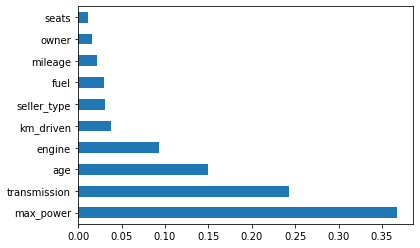

In [91]:
#plot graph of feature importances for better visualizaton
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [93]:
X_train.shape

(5534, 10)

In [94]:
X_train.columns

Index(['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage',
       'engine', 'max_power', 'seats', 'age'],
      dtype='object')

In [95]:
X_test

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
3756,68000,1,0,1,0,22,1248,74,5,6
5692,110000,1,1,1,0,26,1248,74,5,5
3637,185000,1,1,1,2,19,1405,70,5,8
7693,66176,3,2,2,1,19,1459,92,5,5
3565,15000,4,1,0,0,20,1197,81,5,2
...,...,...,...,...,...,...,...,...,...,...
3730,60000,4,1,1,2,21,814,55,5,6
3017,76000,1,1,1,0,25,936,57,5,7
4751,19723,4,0,0,0,20,1199,84,5,3
7056,150000,1,1,1,0,15,1997,120,7,5


In [96]:
y

0       450000
1       370000
2       681589
3       225000
4       130000
         ...  
8123    320000
8124    681589
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7906, dtype: int32

In [97]:
X_train

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
3972,108000,1,1,1,0,21,1396,88,5,5
4355,50000,4,1,1,0,14,1798,138,5,5
6835,50000,1,1,1,0,21,1248,88,5,7
4157,100000,1,1,1,0,23,1396,70,5,7
2570,14000,1,1,1,0,16,1493,70,7,1
...,...,...,...,...,...,...,...,...,...,...
5374,5000,4,1,1,0,21,1197,83,5,1
5544,60000,4,1,1,2,18,1198,86,5,4
888,90000,4,1,1,2,13,1495,94,5,17
7820,155000,1,1,0,2,16,1995,181,4,8


## Model Building

In [98]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

## HyperParameter

In [99]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [100]:
#Grid Search CV

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

#Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

#max_depth.append(None)
#Minimum number of samples required to split a node.

min_samples_split = [2,5, 10, 15, 100]

#Minium number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]



In [101]:
# RandomizedSearchCV

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf}

In [102]:
from sklearn.model_selection import RandomizedSearchCV
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [103]:
#Use the random grid to search for best hyperparameters\
#First create the base model to tune

rf = RandomForestRegressor()

In [104]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose= 3, n_jobs=1 )

In [105]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=700;, score=-50762490838.440 total time=   2.5s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=700;, score=-41851526474.533 total time=   2.5s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=700;, score=-31865517152.836 total time=   2.4s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=700;, score=-60671123570.295 total time=   2.5s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=700;, score=-38714797466.482 total time=   2.9s
[CV 1/5] END max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=-48373647466.722 total time=   0.6s
[CV 2/5] END max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=-32330620283.393 total time=   0.9s
[CV 3/5] END max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=-20481204964.914 total time=   0.5s
[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=-68436361928.916 total time=   0.6s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=-24903423659.040 total time=   0.6s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=700;, score=-69842866426.819 total time=   4.3s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=700;, score=-64110122787.341 total time=   3.4s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=700;, score=-48398299174.700 total time=   3.2s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=700;, score=-110061834768.110 total time=   3.5s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=700;, score=-62978317278.820 total time=   3.4s
[CV 1/5] END max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=500;, score=-82277744189.417 total time=   1.1s
[CV 2/5] END max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=500;, score=-67176311877.883 total time=   1.1s
[CV 3/5] END max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=500;, score=-51865518576.429 total time=   1.1s
[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=500;, score=-110011813415.994 total time=   1.1s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=500;, score=-57440628916.453 total time=   1.3s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=100, n_esti

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-38384880798.557 total time=   0.6s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-29398220704.858 total time=   0.6s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-22580546589.501 total time=   0.6s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-52935238401.903 total time=   0.6s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=-27154122563.515 total time=   0.6s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500;, score=-45770941647.091 total time=   2.9s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500;, score=-33732795680.237 total time=   2.9s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500;, score=-25802646372.837 total time=   2.8s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500;, score=-62006609591.045 total time=   2.8s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500;, score=-28573726118.076 total time=   2.8s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=200;, score=-37628859802.620 total time=   1.2s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=200;, score=-30481975918.774 total time=   1.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=200;, score=-22854698606.531 total time=   1.2s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=200;, score=-54691092024.950 total time=   1.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=200;, score=-27845738083.754 total time=   1.2s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=800;, score=-88618405737.035 total time=   1.5s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=800;, score=-68007297275.571 total time=   1.6s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=800;, score=-56308271769.285 total time=   1.6s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=800;, score=-112016913650.593 total time=   1.5s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=800;, score=-63756903058.510 total time=   1.4s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=3)

In [106]:
best_random = rf_random.best_params_
best_random

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [107]:
rf_model = RandomForestRegressor(n_estimators= 1000,
                                 min_samples_split= 5,
                                 min_samples_leaf= 2,
                                 max_features = 'log2',
                                 max_depth = 20,
                                 random_state=42)

In [108]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='log2', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=1000, random_state=42)

In [109]:
predictions = rf_model.predict(X_test)

In [110]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=400;, score=-55476498297.654 total time=   1.1s
[CV 2/5] END max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=400;, score=-36852986230.319 total time=   1.1s
[CV 3/5] END max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=400;, score=-23610146756.258 total time=   1.1s
[CV 4/5] END max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=400;, score=-74741104555.300 total time=   1.0s
[CV 5/5] END max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=400;, score=-30612599142.729 total time=   1.0s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=400;, score=-64962544922.797 total time=   0.7s
[CV 2/5] END max_depth=5, max_features=lo

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200;, score=-37941187626.877 total time=   7.5s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200;, score=-30095219266.926 total time=   7.3s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200;, score=-22567310126.891 total time=   7.4s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200;, score=-53455925277.667 total time=   7.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200;, score=-27398958326.127 total time=   7.1s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800;, score=-82376579038.657 total time=   1.7s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800;, score=-65024833830.658 total time=   1.7s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800;, score=-51470211617.479 total time=   1.7s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800;, score=-107478710049.161 total time=   1.9s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800;, score=-56519267061.572 total time=   1.8s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimator

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-33428354906.350 total time=   0.5s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-30636623745.549 total time=   0.5s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-22459504193.896 total time=   0.5s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-49243478856.248 total time=   0.6s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-24864192277.596 total time=   0.5s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=100, n_estimators=300;, score=-82568978639.572 total time=   0.6s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=100, n_estimators=300;, score=-66132726541.257 total time=   0.6s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=100, n_estimators=300;, score=-53510144213.324 total time=   0.6s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=100, n_estimators=300;, score=-106531589859.712 total time=   0.7s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=100, n_estimators=300;, score=-57339797156.571 total time=   0.6s


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=3)

In [111]:
preds = rf_random.predict(X_test)

In [112]:
comparism = pd.DataFrame({'Y_test': y_test, 'Predictions': preds}, columns=['Y_test', 'Predictions'])

In [113]:
comparism


,Y_test,Predictions
3756,501000,445552.133722
5692,440000,559963.505900
3637,140000,209279.783155
7693,681589,676118.361973
3565,620000,617500.882424
...,...,...
3730,220000,213497.796185
3017,175000,194422.672179
4751,525000,519947.876040
7056,650000,897905.002179


## Model Evaluation

In [114]:
from sklearn.metrics import mean_squared_error
import numpy as np
error = np.sqrt(mean_squared_error(y_test, predictions))
print('The overall error in the model is ${: ,.03f}'.format(error))


The overall error in the model is $ 131,904.952


## Coefficient of Determination

In [115]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
r2

0.9727964385707676

## Predictive System

In [116]:
import pickle
filename = 'model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

In [117]:
import gzip, pickle, pickletools
filepath = "random_forest.pkl"
with gzip.open(filepath, "wb") as f:
    pickled = pickle.dumps(rf_model)
    optimized_pickle = pickletools.optimize(pickled)
    f.write(optimized_pickle)

In [119]:
# Data to be Compresssed
import pickle
import bz2
import os

ofile = open("rf_model.pkl",'wb')
pickle.dump(rf_model, ofile)
ofile.close()
 
print(os.path.getsize("rf_model.pkl"))

114142626


In [121]:
ofile = bz2.BZ2File("rf_model.pkl",'wb')
pickle.dump(rf_model, ofile)
ofile.close()
 
print(os.path.getsize("rf_model.pkl"))

24354886


In [123]:
variable_1= "race"
variable_2= "car"
print(variable_1+variable_2)

racecar
